In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("cr_GTR_G4_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n73          1.8338 ( 1.6204,  2.2733) ( 1.5909,  2.1982)  0.6073 (Jnode 142)\n',
 't_n74          1.5958 ( 1.3897,  1.8665) ( 1.3663,  1.8332)  0.4668 (Jnode 141)\n',
 't_n75          0.9594 ( 0.8825,  1.0411) ( 0.8788,  1.0369)  0.1581 (Jnode 140)\n',
 't_n76          0.8927 ( 0.8238,  0.9649) ( 0.8209,  0.9617)  0.1407 (Jnode 139)\n',
 't_n77          0.8237 ( 0.7613,  0.8894) ( 0.7575,  0.8851)  0.1276 (Jnode 138)\n',
 't_n78          0.8131 ( 0.7515,  0.8780) ( 0.7479,  0.8736)  0.1256 (Jnode 137)\n',
 't_n79          0.7793 ( 0.7204,  0.8414) ( 0.7181,  0.8386)  0.1205 (Jnode 136)\n',
 't_n80          0.7165 ( 0.6615,  0.7751) ( 0.6592,  0.7720)  0.1128 (Jnode 135)\n',
 't_n81          0.6992 ( 0.6453,  0.7572) ( 0.6421,  0.7531)  0.1109 (Jnode 134)\n',
 't_n82          0.6474 ( 0.5957,  0.7040) ( 0.5921,  0.7000)  0.1078 (Jnode 133)\n',
 't_n83          0.5471 ( 0.4948,  0.6046) ( 0.4924,  0.6019)  0.1095 (Jnode 132)\n',
 't_n84          0.4456 ( 0.3921,  0.5029) ( 0.3910,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143']

In [6]:
posterior_mean_iqtree

[1.8338,
 1.5958,
 0.9594,
 0.8927,
 0.8237,
 0.8131,
 0.7793,
 0.7165,
 0.6992,
 0.6474,
 0.5471,
 0.4456,
 0.2528,
 0.1377,
 0.0682,
 0.0353,
 0.0166,
 0.2013,
 0.189,
 0.132,
 0.4831,
 0.4167,
 0.3721,
 0.1041,
 0.3729,
 0.5152,
 0.7661,
 0.7277,
 0.494,
 0.3783,
 0.2281,
 0.1649,
 0.0506,
 0.1712,
 0.1306,
 0.111,
 0.0931,
 0.0719,
 0.0529,
 0.2892,
 0.2588,
 0.1514,
 0.1245,
 0.0513,
 0.2324,
 0.2045,
 0.2233,
 0.6251,
 0.4142,
 0.8158,
 0.791,
 0.7808,
 0.5832,
 0.1701,
 0.0862,
 0.4958,
 0.4172,
 0.7633,
 0.6244,
 0.5879,
 0.5172,
 0.1814,
 0.0785,
 0.6476,
 0.6543,
 0.9423,
 0.7882,
 0.6811,
 0.8028,
 0.5193,
 0.4206]

In [7]:
lower_ci_iqtree

[1.6204,
 1.3897,
 0.8825,
 0.8238,
 0.7613,
 0.7515,
 0.7204,
 0.6615,
 0.6453,
 0.5957,
 0.4948,
 0.3921,
 0.2083,
 0.1091,
 0.0524,
 0.0267,
 0.0124,
 0.1642,
 0.1539,
 0.1054,
 0.4333,
 0.3699,
 0.327,
 0.0828,
 0.3233,
 0.4731,
 0.7072,
 0.6706,
 0.4374,
 0.3278,
 0.1911,
 0.1356,
 0.039,
 0.1415,
 0.1071,
 0.0905,
 0.0754,
 0.0575,
 0.042,
 0.2447,
 0.2174,
 0.1219,
 0.0993,
 0.0393,
 0.1848,
 0.1611,
 0.1771,
 0.5615,
 0.3371,
 0.756,
 0.7341,
 0.725,
 0.526,
 0.1315,
 0.064,
 0.4382,
 0.3593,
 0.7094,
 0.5704,
 0.5338,
 0.4625,
 0.1402,
 0.0579,
 0.6046,
 0.6022,
 0.8669,
 0.7125,
 0.5959,
 0.7311,
 0.2981,
 0.2389]

In [8]:
upper_ci_iqtree

[2.2733,
 1.8665,
 1.0411,
 0.9649,
 0.8894,
 0.878,
 0.8414,
 0.7751,
 0.7572,
 0.704,
 0.6046,
 0.5029,
 0.3028,
 0.1715,
 0.0878,
 0.0462,
 0.0219,
 0.2435,
 0.2293,
 0.163,
 0.5362,
 0.4663,
 0.4199,
 0.1294,
 0.4238,
 0.58,
 0.8277,
 0.7868,
 0.5529,
 0.4328,
 0.2698,
 0.1987,
 0.0651,
 0.2052,
 0.1581,
 0.1351,
 0.114,
 0.089,
 0.066,
 0.3382,
 0.3049,
 0.1855,
 0.154,
 0.0661,
 0.2826,
 0.2507,
 0.2724,
 0.6839,
 0.4876,
 0.8777,
 0.849,
 0.8372,
 0.6385,
 0.2142,
 0.113,
 0.553,
 0.4752,
 0.8176,
 0.674,
 0.6376,
 0.5683,
 0.2295,
 0.1047,
 0.6735,
 0.7118,
 1.0219,
 0.862,
 0.7568,
 0.8745,
 0.6966,
 0.5635]

In [9]:
file_LG = open("cr_GTR_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

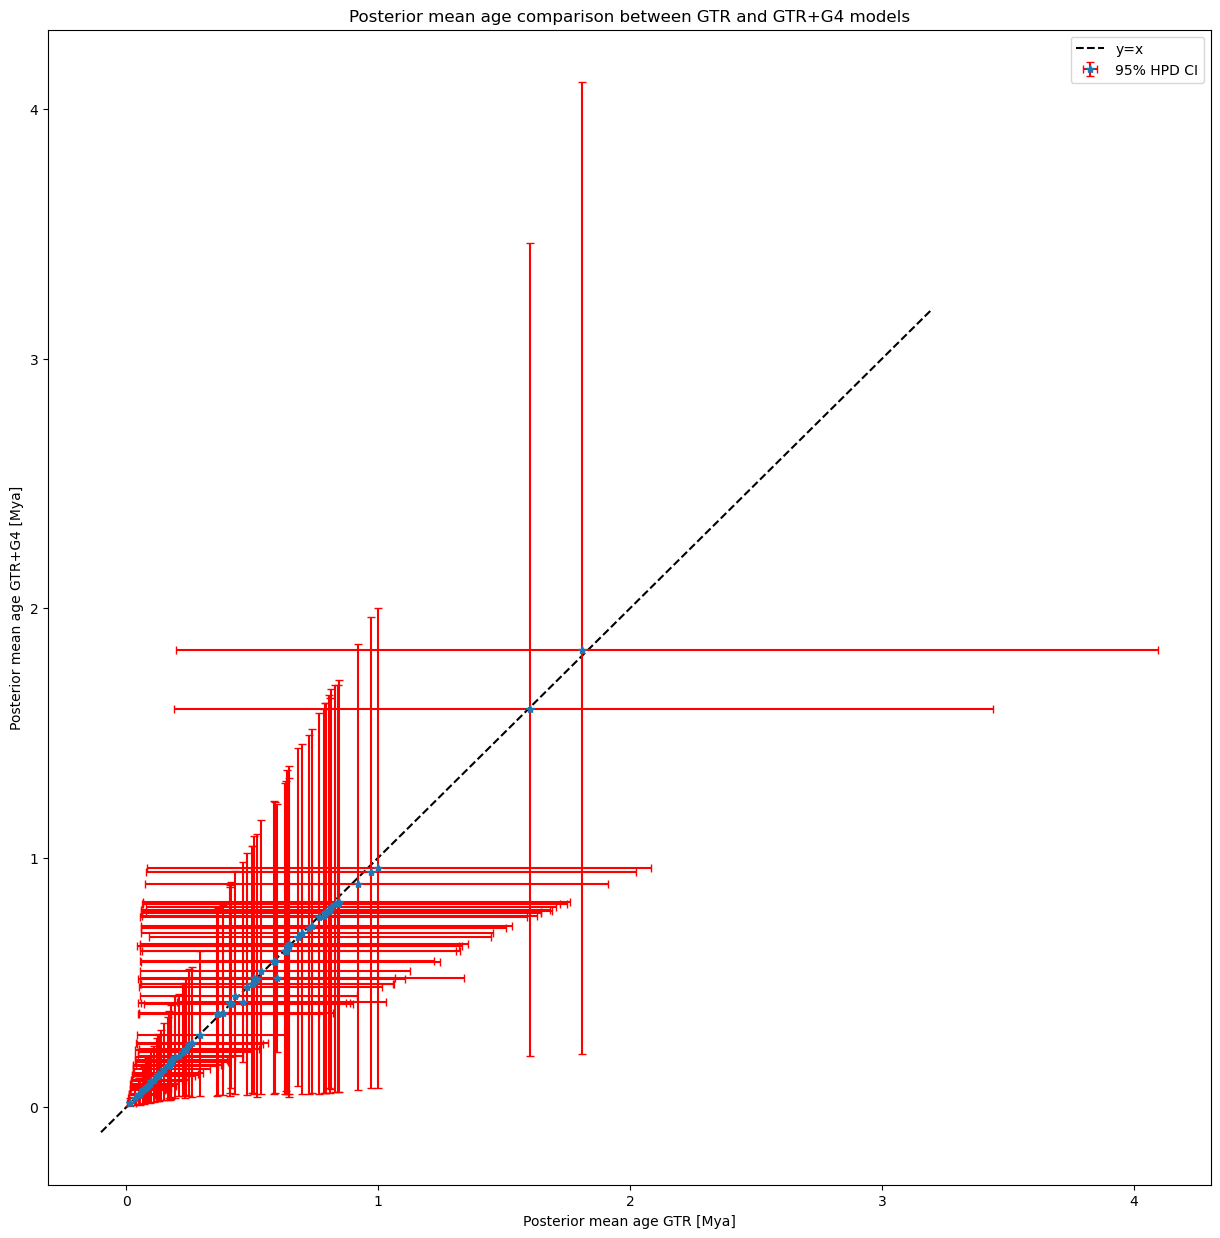

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,3.2],
        [-0.1, 3.2],
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age GTR [Mya]')
ax.set_ylabel('Posterior mean age GTR+G4 [Mya]')
ax.set_title('Posterior mean age comparison between GTR and GTR+G4 models')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./cr_mammals_posterior_mean_age_comparison_GTR_G4.png')

In [11]:
posterior_mean_baseml

[1.8095,
 1.6009,
 0.9982,
 0.9188,
 0.846,
 0.8285,
 0.7908,
 0.7248,
 0.6993,
 0.6388,
 0.5364,
 0.4313,
 0.2473,
 0.1362,
 0.0676,
 0.0348,
 0.0163,
 0.1947,
 0.1795,
 0.1271,
 0.4809,
 0.4103,
 0.3589,
 0.0982,
 0.3653,
 0.5198,
 0.7835,
 0.7362,
 0.5036,
 0.384,
 0.2317,
 0.1672,
 0.0511,
 0.1733,
 0.1316,
 0.1116,
 0.0933,
 0.0721,
 0.0529,
 0.2926,
 0.2604,
 0.1515,
 0.1239,
 0.0507,
 0.2374,
 0.2076,
 0.2261,
 0.6343,
 0.4162,
 0.8416,
 0.8093,
 0.7926,
 0.5918,
 0.1704,
 0.0849,
 0.498,
 0.4124,
 0.7662,
 0.6289,
 0.5857,
 0.5064,
 0.1797,
 0.0767,
 0.647,
 0.6471,
 0.9701,
 0.8062,
 0.6821,
 0.8141,
 0.5973,
 0.4627]

In [12]:
posterior_mean_iqtree

[1.8338,
 1.5958,
 0.9594,
 0.8927,
 0.8237,
 0.8131,
 0.7793,
 0.7165,
 0.6992,
 0.6474,
 0.5471,
 0.4456,
 0.2528,
 0.1377,
 0.0682,
 0.0353,
 0.0166,
 0.2013,
 0.189,
 0.132,
 0.4831,
 0.4167,
 0.3721,
 0.1041,
 0.3729,
 0.5152,
 0.7661,
 0.7277,
 0.494,
 0.3783,
 0.2281,
 0.1649,
 0.0506,
 0.1712,
 0.1306,
 0.111,
 0.0931,
 0.0719,
 0.0529,
 0.2892,
 0.2588,
 0.1514,
 0.1245,
 0.0513,
 0.2324,
 0.2045,
 0.2233,
 0.6251,
 0.4142,
 0.8158,
 0.791,
 0.7808,
 0.5832,
 0.1701,
 0.0862,
 0.4958,
 0.4172,
 0.7633,
 0.6244,
 0.5879,
 0.5172,
 0.1814,
 0.0785,
 0.6476,
 0.6543,
 0.9423,
 0.7882,
 0.6811,
 0.8028,
 0.5193,
 0.4206]

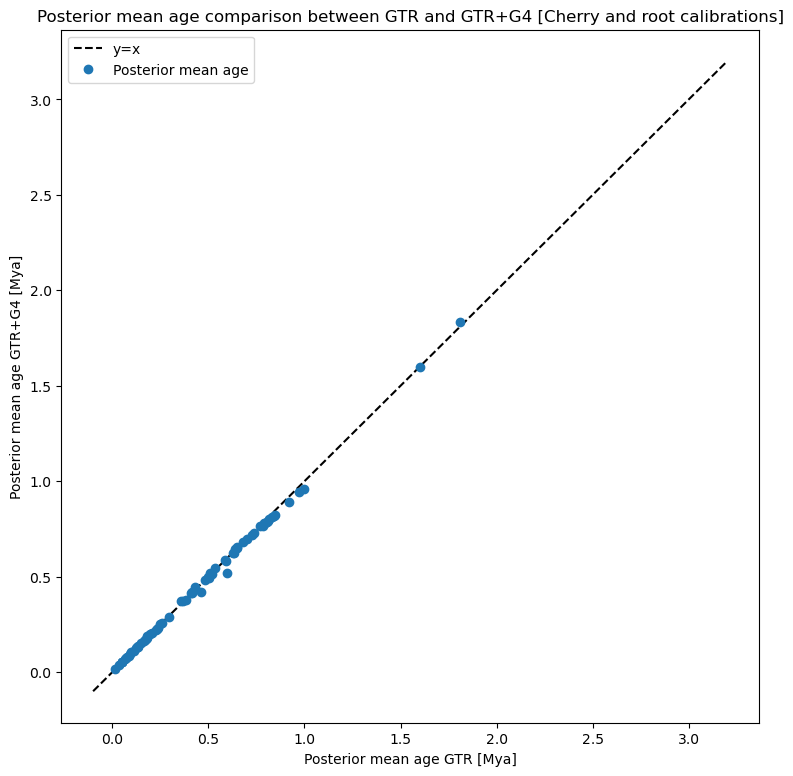

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,3.2],
        [-0.1, 3.2],
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age GTR [Mya]')
ax.set_ylabel('Posterior mean age GTR+G4 [Mya]')
ax.set_title('Posterior mean age comparison between GTR and GTR+G4 [Cherry and root calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./cr_mammals_posterior_mean_age_comparison_GTR_G4_scatter.png')

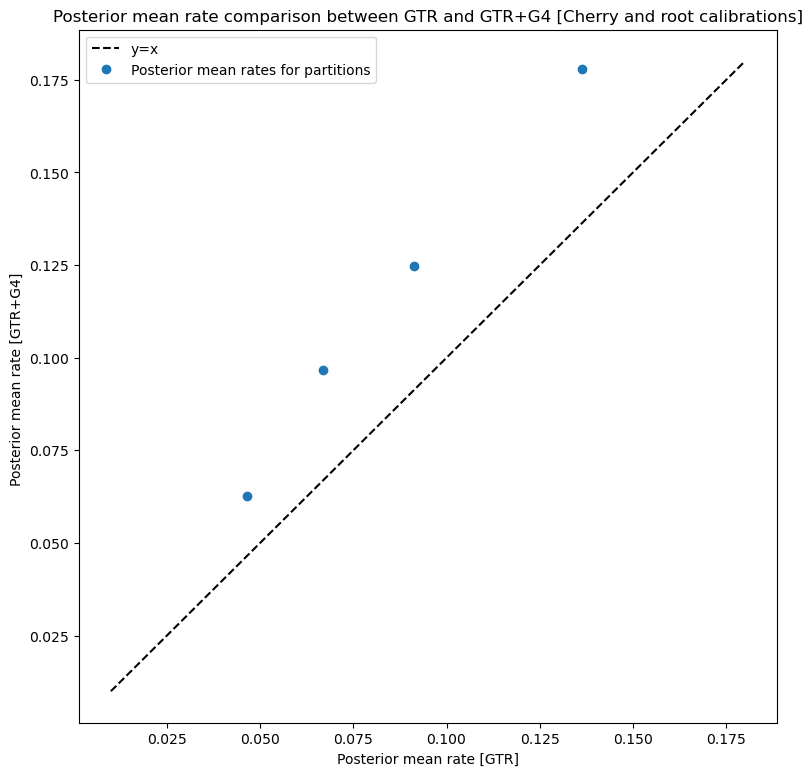

In [14]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.18], 
        [0.01, 0.18], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [GTR]')
ax.set_ylabel('Posterior mean rate [GTR+G4] ')
ax.set_title('Posterior mean rate comparison between GTR and GTR+G4 [Cherry and root calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./cr_mammals_posterior_mean_rate_comparison_GTR_G4_all_scatter.png')